In [6]:
import ibllib
import sys
import re
from datetime import timedelta
from pathlib import Path

import cv2
import numpy as np

# from iblutil.util import Bunch
from sklearn.utils import Bunch
import matplotlib.pyplot as plt
from pathlib import Path
import ibllib.io.raw_data_loaders as raw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from scipy import interpolate
import seaborn as sns
import pytz

import logging
_logger = logging.getLogger('ibllib')
import json
#from ibllib.misc import version

In [7]:
pip show ibllib

Name: ibllib
Version: 2.9.0
Summary: IBL libraries
Home-page: https://www.internationalbrainlab.com/
Author: IBL Staff
Author-email: 
License: MIT
Location: c:\programdata\anaconda3\envs\iblenv\lib\site-packages
Requires: boto3, click, colorlog, flake8, globus-sdk, graphviz, iblutil, jupyter, jupyterlab, matplotlib, mtscomp, numba, numpy, ONE-api, opencv-python, pandas, phylib, pyarrow, pynrrd, pytest, requests, scikit-learn, scipy, seaborn, tqdm
Required-by: iblrig, pybpod-gui-plugin-alyx
Note: you may need to restart the kernel to use updated packages.


read relevant documentation :
    https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#
        
source code adapted from: 
    https://int-brain-lab.github.io/iblenv/_modules/ibllib/io/video.html#get_video_frames_preload

# Get a session to explore

In [23]:
session_path = r'C:\iblrig_data\Subjects\MBOT53_013\2022-11-07\003/'
vidPath =session_path + 'raw_video_data//_iblrig_leftCamera.raw.avi'

In [24]:
from ibllib.io.raw_data_loaders import *

In [25]:
from ibllib.io.video import get_video_meta
# check the video length (in frames)
get_video_meta(vidPath)['length']

82919

# Load IBL data

In [26]:
# trial-wise list of dictionaries 
data =load_data(session_path)
# stim_angle_path =session_path +'raw_behavior_data//_iblrig_stimPositionScreen.raw.csv
stim_angle_data =load_stim_position_screen(session_path)
# # wheel data
# wheel = load_encoder_positions(Path(session_path))
# cam
cam_frameData = load_camera_frameData(session_path, camera= 'left', raw = False) 

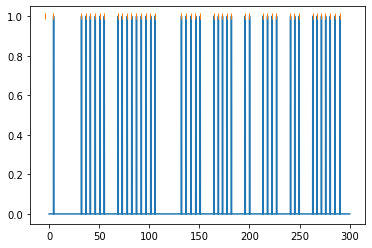

In [42]:

# first we need to convert the bpod init time to the same format as the bonsai timestamps, which is a weird one:
init_time_bpod= pd.Series(pd.to_datetime(data[0]['init_datetime'])).dt.tz_localize(pytz.FixedOffset(-420))[0]

# initializing a var to track unsynced trials, and lists of port events 
unsynced_trial_count = 0
frame2ttl = []
sound = []
camera = []
trial_end = []
trialStart = []
# trialEnd=2

# get only first trial data
for trial_data in data:
    ev_bnc1 = get_port_events(trial_data, name='BNC1')
    ev_bnc2 = get_port_events(trial_data, name='BNC2')
    ev_port1 = get_port_events(trial_data, name='Port1')
    if not ev_bnc1 or not ev_bnc2 or not ev_port1:
        unsynced_trial_count += 1
    frame2ttl.extend(ev_bnc1)
    sound.extend(ev_bnc2)
    camera.extend(ev_port1)
    trial_end.append(trial_data['behavior_data']['Trial end timestamp'])
    trialStart.append(trial_data['behavior_data']['Trial start timestamp'])
    
pin = [i[0] for i in cam_frameData['embeddedGPIOPinState'].values]
shift = -3.8
maxTime =300
trialStart1 = np.array(trialStart)+shift
timesCam = cam_frameData.embeddedTimeStamp.values
timesBpod = trialStart1

timesCam1 = timesCam[timesCam<maxTime]
timesBpod = timesBpod[timesBpod<maxTime]
pin = np.array(pin)[timesCam<maxTime]

plt.plot(timesCam1,pin)
plt.plot(timesBpod,np.ones(len(timesBpod)),'|')
# plt.plot(sound,np.ones(len(sound)),'|')

In [33]:
m

array([ 0.      ,  0.03325 ,  0.0665  ,  0.099875,  0.133125,  0.166375,
        0.19975 ,  0.233   ,  0.26625 ,  0.299625,  0.332875,  0.366125,
        0.3995  ,  0.43275 ,  0.466   ,  0.499375,  0.532625,  0.565875,
        0.59925 ,  0.6325  ,  0.66575 ,  0.699125,  0.732375,  0.765625,
        0.799   ,  0.83225 ,  0.8655  ,  0.898875,  0.932125,  0.965375,
        0.99875 ,  1.032   ,  1.06525 ,  1.0985  ,  1.131875,  1.165125,
        1.198375,  1.23175 ,  1.265   ,  1.29825 ,  1.331625,  1.364875,
        1.398125,  1.4315  ,  1.46475 ,  1.498   ,  1.531375,  1.564625,
        1.597875,  1.63125 ,  1.6645  ,  1.69775 ,  1.731125,  1.764375,
        1.797625,  1.831   ,  1.86425 ,  1.8975  ,  1.930875,  1.964125,
        1.997375,  2.030625,  2.064   ,  2.09725 ,  2.1305  ,  2.163875,
        2.197125,  2.230375,  2.26375 ,  2.297   ,  2.33025 ,  2.363625,
        2.396875,  2.430125,  2.4635  ,  2.49675 ,  2.53    ,  2.563375,
        2.596625,  2.629875,  2.66325 ,  2.6965  , 

In [13]:
unsynced_trial_count

0

In [ ]:
camera[-10:]

In [ ]:
 unsynced_trial_count

In [ ]:
cam_frameData

In [ ]:
# cam_frameData

cameraPin = np.array([i[3] for i in cam_frameData['embeddedGPIOPinState']])
camTimes = np.array(cam_frameData['Timestamp'].values)
points =40
upcam = camTimes[np.where(cameraPin>0)[0]]

s2 = sound[slice(0,len(sound),4)]
# plt.plot(upcam[:points],np.ones(points))
plt.plot(np.array(s2[:points])+0,np.ones(points),'|')

In [ ]:
camera

In [ ]:
sound[slice(0,len(sound),4)]

In [ ]:
cam_frameData

In [ ]:
300067-78629

In [ ]:
print('Cam frames count = ' + str(len(cam_frameData)) + '\nTotal camera port events length is: ' + str(len(camera)))

In [ ]:
def getSyncedArray_values(reference_array, array2,vals):
    # make array of same len as the "reference" array 
    relativeArray = np.zeros(len(reference_array))
    #get the indices of the closest events for each event in array2
    for s,v in zip(array2,vals):
        idx =  (np.abs(np.array(reference_array) - np.array(s))).argmin()
        #assign 1 to those positions in the zeros array
        relativeArray[idx]=v
    return (relativeArray)
def getSyncedArray_events(reference_array, array2):
    # make array of same len as the "reference" array 
    relativeArray = np.zeros(len(reference_array))
    #get the indices of the closest events for each event in array2
    idx =  [(np.abs(np.array(reference_array) - np.array(s))).argmin() for s in array2]
    #assign 1 to those positions in the zeros array
    relativeArray[idx]=1
    return (relativeArray)
def getSyncedArray_periods(reference_array, array2):
    # make array of same len as the "reference" array 
    relativeArray = np.zeros(len(reference_array))
    #get the indices of the closest events for each event in array2
    idx =  [(np.abs(np.array(reference_array) - np.array(s))).argmin() for s in array2]
    assert len(idx)==2
    #assign 1 to those positions in the zeros array
    relativeArray[idx[0]:idx[1]]=1
    return (relativeArray)

In [ ]:
camBonsai= np.array(cam_frame_df.embeddedTimeStamp.values)
camBpod = np.array(camera)
#camBpod = camBpod-min(camBpod) # ?? shall we do this? 

camBpod_sync_index =  getSyncedArray_events(camBpod, camBonsai)



In [ ]:
len(camBpod[camBpod_sync_index.astype('int')])

In [ ]:
frame2ttl = []
sound = []
camera = []
trial_end = []
trial_num = []
trial_start = []
stim_on = []
interactive_delay = []
closed_loop = []
quiescent_period  = []

unsynced_trial_count = 0
for trial_data in data:
    ev_bnc1 = get_port_events(trial_data, name='BNC1')
    ev_bnc2 = get_port_events(trial_data, name='BNC2')
    ev_port1 = get_port_events(trial_data, name='Port1')
    #print(len(ev_port1))
    if not ev_bnc1 or not ev_bnc2 or not ev_port1:
        unsynced_trial_count += 1
    frame2ttl.append(ev_bnc1)
    sound.append(ev_bnc2)
    camera.append(np.array(ev_port1))
    trial_num.append([trial_data['trial_num']]*len(ev_port1))
    trial_end.append(trial_data['behavior_data']['Trial end timestamp'])
    trial_start.append(trial_data['behavior_data']['States timestamps'][ 'trial_start'][0][-1])
    stim_on.append(trial_data['behavior_data']['States timestamps'][ 'stim_on'][0])
    interactive_delay.append(trial_data['behavior_data']['States timestamps'][ 'interactive_delay'][0])
    closed_loop.append(trial_data['behavior_data']['States timestamps'][ 'closed_loop'][0])
    quiescent_period.append(trial_data['behavior_data']['States timestamps'][ 'quiescent_period'][0])

In [ ]:
len(camera[0])

In [ ]:
relativeSound = []
relativeFtoTTL = []
relativetrial_end = []
relativetrial_start = []
relativestim_on = []
relativeinteractive_delay = []
relativeclosed_loop = []
relativequiescent_period  = []

for i,cam in enumerate(camera):
    relativeSound.append(getSyncedArray_events(cam, sound[i]))
    relativeFtoTTL.append(getSyncedArray_events(cam, frame2ttl[i]))
    relativetrial_end.append(getSyncedArray_events(cam, [trial_end[i]]))
    relativetrial_start.append(getSyncedArray_events(cam, [trial_start[i]]))
    relativestim_on.append(getSyncedArray_periods(cam, stim_on[i]))
    relativeinteractive_delay.append(getSyncedArray_periods(cam, interactive_delay[i]))
    relativeclosed_loop.append(getSyncedArray_periods(cam, closed_loop[i]))
    relativequiescent_period.append(getSyncedArray_periods(cam, quiescent_period[i]))

In [ ]:
# todo: improve this
stim_angle_data['reltimestamps'] = stim_angle_data['bns_ts'] - stim_angle_data['bns_ts'][0]
stim_angle_data['rel_time_secs'] = (stim_angle_data['reltimestamps'].apply(lambda x: x.value))// 10 ** 9 
stim_angle_data['angle_deg'] = [np.degrees(i) for i in stim_angle_data['position'].values]
sync_stim_angle = getSyncedArray_values(camBpod, stim_angle_data['rel_time_secs'].values,stim_angle_data['position'].values)

In [ ]:
CamDF =pd.DataFrame ({
'Cam_frame_number': np.arange(0,len(np.concatenate(camera)),1),    
'trial_num': np.concatenate(trial_num),
'frame2ttl':np.concatenate(relativeFtoTTL),
'soundToTTL': np.concatenate(relativeFtoTTL),
'cameraTimes':  np.concatenate(camera),
 'trial_end':  np.concatenate(relativetrial_end),
'trial_start' :  np.concatenate(relativetrial_start),
'stim_on':  np.concatenate(relativestim_on),
'interactive_delay':  np.concatenate(relativeinteractive_delay),
'closed_loop':  np.concatenate(relativeclosed_loop),
'quiescent_period' :  np.concatenate(relativequiescent_period),
'sync_stim_angle':sync_stim_angle,
'isTrueFrame_bonsai': camBpod_sync_index
})

sns.lineplot(data = CamDF[1000:2000],x='Cam_frame_number',y= 'closed_loop')
# sns.lineplot(data = CamDF[:1000],x='Cam_frame_number',y= 'sync_stim_angle')
sns.lineplot(data = CamDF[1000:2000],x='Cam_frame_number',y= 'frame2ttl',color = 'black')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import animation, rc
from IPython.display import HTML
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def makeMovieMori(mov,CamDF,**MovieParams):
    gain =MovieParams['gain'] 
    fr =MovieParams['fr']
    magnification = MovieParams['magnification']
    offset=MovieParams['offset']
    q_max=MovieParams['q_max']
    q_min=MovieParams['q_min']
    ifinterval = MovieParams['ifinterval']
    frame_numbers = MovieParams['frame_numbers']

    # First set up the figure, the axis, and the plot element we want to animate
    fig, axes = plt.subplots(1,3,figsize=(10,4))
    ax = axes[0]
    ax.set_xlim(( 0, mov.shape[2]))
    ax.set_ylim((0, mov.shape[1]))
    maxmov = np.nanpercentile(mov[0:10], q_max) if q_max < 100 else np.nanmax(mov)
    minmov = np.nanpercentile(mov[0:10], q_min) if q_min > 0 else np.nanmin(mov)

    ax.set_title("Mouse movie")
    im = ax.imshow((offset + mov[0] - minmov) * gain / (maxmov - minmov + offset),
                               #cmap=pl.cm.gray,
                               vmin=0.0,
                               vmax=1,
                               interpolation='none',aspect='auto')  
    
  
    
    # Middle plot
    ax2 = axes[1]

    x= frame_numbers
    y0= CamDF[['sync_stim_angle']].values

    ax2.set_xlim(min(frame_numbers), max(frame_numbers))
    ax2.set_ylim(min(y0),max(y0))
    
    line0, = ax2.plot([], [],label= 'Stim_angle',lw=2)
    ax2.set_title('Stim angle')
    
    # Right plot
    ax3 = axes[2]

    x= frame_numbers
    y= CamDF[['stim_on', 'interactive_delay',
       'closed_loop', 'quiescent_period']].values
    labels = ['stim_on', 'interactive_delay',
       'closed_loop', 'quiescent_period']

    ax3.set_xlim(min(frame_numbers), max(frame_numbers))
    ax3.set_ylim(-0.2,2)
    
    line1, = ax3.plot([], [],label= 'stim_on',lw=2)
    line2, = ax3.plot([], [],label= 'interactive_delay', lw=2)
    line3, = ax3.plot([], [],label= 'closed_loop',lw=2)
    line4, = ax3.plot([], [], label= 'quiescent_period',lw=2)
    ax3.set_title('Trial epochs')
    
    legend = ax3.legend(bbox_to_anchor=(1.1, 0.2))
    #plt.tight_layout()
    
    
    
    # initialization function: plot the background of each frame
    def init():
        im.set_data( mov[0])
        line0.set_data((x[0], y[0]))
        line1.set_data((x[0], y[0]))
        line2.set_data((x[0], y[0]))
        line3.set_data((x[0], y[0]))
        line4.set_data((x[0], y[0]))
        
        return (im,line1,line2,line3,line4,)
    
    # animation function. This is called sequentially
    def animate(i):
        im.set_data((offset + cv2.flip(mov[i],0) - minmov) * gain / (maxmov - minmov + offset))
        
        line0.set_data((x[:i],y0[:i]))
        
        line1.set_data((x[:i],y[:i,0]))
        line2.set_data((x[:i],y[:i,1]))
        line3.set_data((x[:i],y[:i,2]))
        line4.set_data((x[:i],y[:i,3]))
        return (im,line0,line1,line2,line3,line4,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=mov.shape[0], interval=ifinterval, blit=True)
    
    return anim
    


In [ ]:
from ibllib.io.video import get_video_frames_preload
frame_numbers=np.arange(10000,10500,1)
vid= get_video_frames_preload(vidPath, frame_numbers=frame_numbers)


In [ ]:
CamDF_vid =CamDF[CamDF.isTrueFrame_bonsai==True]
CamDF_vid =CamDF_vid.iloc[frame_numbers]
mov = vid
MovieParams = {
'gain' : 1,
'fr':None,
'magnification':1,
'offset':0,
'q_max':99.8,
'q_min':10,
'ifinterval': 60,
'frame_numbers':frame_numbers}

# assert len(CamDF_vid) == 
anim = makeMovieMori(mov,CamDF_vid,**MovieParams)
HTML(anim.to_html5_video())

In [ ]:
len(CamDF)

In [ ]:
import seaborn as sns
import pytz
# first we need to convert the bpod init time to the same format as the bonsai timestamps, which is a weird one:
init_time_bpod= pd.Series(pd.to_datetime(data[0]['init_datetime'])).dt.tz_localize(pytz.FixedOffset(-420))[0]

# initializing a var to track unsynced trials, and lists of port events 
unsynced_trial_count = 0
frame2ttl = []
sound = []
camera = []
trial_end = []
trialStart = 0
# trialEnd=2

# get only first trial data
for trial_data in data:
    ev_bnc1 = get_port_events(trial_data, name='BNC1')
    ev_bnc2 = get_port_events(trial_data, name='BNC2')
    ev_port1 = get_port_events(trial_data, name='Port1')
    if not ev_bnc1 or not ev_bnc2 or not ev_port1:
        unsynced_trial_count += 1
    frame2ttl.extend(ev_bnc1)
    sound.extend(ev_bnc2)
    camera.extend(ev_port1)
    trial_end.append(trial_data['behavior_data']['Trial end timestamp'])
#now we can subtract bpod init time so that all bonsai timestamps are relative to bpod time.
# stim_angle_data['reltimestamps'] = stim_angle_data['bns_ts'] - init_time_bpod
# stim_angle_data['rel_time_secs'] = stim_angle_data['reltimestamps'].apply(lambda x: x.value)/ 10 ** 9

stim_angle_data['reltimestamps'] = stim_angle_data['bns_ts'] - stim_angle_data['bns_ts'][0]
stim_angle_data['rel_time_secs'] = (stim_angle_data['reltimestamps'].apply(lambda x: x.value))// 10 ** 9 
stim_angle_data['angle_deg'] = [np.degrees(i) for i in stim_angle_data['position'].values]
# init_time_bonsai = stim_angle_data['rel_time_secs'][0]
# print(f'this session started on: {init_time_bpod}, \n and the first bonsai angle was recorded {init_time_bonsai} secs later')
df =stim_angle_data
# conds = (df.rel_time_secs<trial_end[trialEnd-1])
# dfplot = df[conds]
# angles, t = interpolate_position(dfplot['rel_time_secs'].values, dfplot['position'],freq=1000)

fig,ax = plt.subplots()
# plt.scatter(dfplot.rel_time_secs,dfplot.angle_deg,color='black')
# # plt.plot(t,angles,'black')

plt.plot(camera, np.ones(len(camera)) * 0.2, '|',markersize=10)
plt.plot(sound, np.ones(len(sound)) * -0.5, '|',markersize=25)
plt.plot(trial_end, np.ones(len(trial_end)) * -1, '|',markersize=25)
plt.plot(frame2ttl, np.ones(len(frame2ttl)) * -0.8, '|',markersize=25)

# ax2 = ax.twinx()


# wheel['time_sec'] = (wheel.re_ts- wheel.re_ts[0])/10**6 
# pos, t = interpolate_position(wheel['time_sec'].values, wheel.re_pos.values,freq=1000)
# #sec = dfplot.rel_time_secs.values[-1]  # Number of seconds to plot
# # plt.figure()

# # Plot the interpolated data points
# mask = t < (t[0] + sec)
# #ax2.plot(t[mask], pos[mask], '.', markeredgecolor='lightgrey', markersize=1,alpha = 0.1)
# # Plot the original data
# mask =wheel['time_sec'].values < (wheel['time_sec'].values[0] + sec)
# #ax2.plot(wheel['time_sec'].values[mask],  wheel.re_pos.values[mask], 'r+', markersize=6,alpha = 0.1)

# Labels etc.
plt.xlabel('time / sec')
plt.ylabel('position / rad')
plt.box(on=None)
plt.show()

In [ ]:
def traces_by_trial(t, *args, start=None, end=None, separate=True):
    """
    Returns list of tuples of positions and velocity for samples between stimulus onset and
    feedback.
    :param t: numpy array of timestamps
    :param args: optional numpy arrays of the same length as timestamps, such as positions,
    velocities or accelerations
    :param start: start timestamp or array thereof
    :param end: end timestamp or array thereof
    :param separate: when True, the output is returned as tuples list of the form [(t, args[0],
    args[1]), ...], when False, the output is a list of n-by-m ndarrays where n = number of
    positional args and m = len(t)
    :return: list of sliced arrays where length == len(start)
    """
    if start is None:
        start = t[0]
    if end is None:
        end = t[-1]
    traces = np.stack((t, *args))
    assert len(start) == len(end), 'number of start timestamps must equal end timestamps'

    def to_mask(a, b):
        return np.logical_and(t > a, t < b)

    cuts = [traces[:, to_mask(s, e)] for s, e in zip(start, end)]
    return [(cuts[n][0, :], cuts[n][1, :]) for n in range(len(cuts))] if separate else cuts


def sync_trials_robust(t0, t1, diff_threshold=0.001, drift_threshold_ppm=200, max_shift=5,
                       return_index=False):
    """
    Attempts to find matching timestamps in 2 time-series that have an offset, are drifting,
    and are most likely incomplete: sizes don't have to match, some pulses may be missing
    in any series.
    Only works with irregular time series as it relies on the derivative to match sync.
    :param t0:
    :param t1:
    :param diff_threshold:
    :param drift_threshold_ppm: (150)
    :param max_shift: (200)
    :param return_index (False)
    :return:
    """
    nsync = min(t0.size, t1.size)
    dt0 = np.diff(t0)
    dt1 = np.diff(t1)
    ind = np.zeros_like(dt0) * np.nan
    i0 = 0
    i1 = 0
    cdt = np.nan  # the current time difference between the two series to compute drift
    while i0 < (nsync - 1):
        # look in the next max_shift events the ones whose derivative match
        isearch = np.arange(i1, min(max_shift + i1, dt1.size))
        dec = np.abs(dt0[i0] - dt1[isearch]) < diff_threshold
        # another constraint is to check the dt for the maximum drift
        if ~np.isnan(cdt):
            drift_ppm = np.abs((cdt - (t0[i0] - t1[isearch])) / dt1[isearch]) * 1e6
            dec = np.logical_and(dec, drift_ppm <= drift_threshold_ppm)
        # if one is found
        if np.any(dec):
            ii1 = np.where(dec)[0][0]
            ind[i0] = i1 + ii1
            i1 += ii1 + 1
            cdt = t0[i0 + 1] - t1[i1 + ii1]
        i0 += 1
    it0 = np.where(~np.isnan(ind))[0]
    it1 = ind[it0].astype(int)
    ind0 = np.unique(np.r_[it0, it0 + 1])
    ind1 = np.unique(np.r_[it1, it1 + 1])
    if return_index:
        return t0[ind0], t1[ind1], ind0, ind1
    else:
        return t0[ind0], t1[ind1]


In [ ]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data =np.squeeze(vid[:,:,:,0])
datagray = np.zeros(data.shape)
for i in range(len(data)):
    datagray[i,:,:]=cv2.cvtColor(vid[i,:,:,:],cv2.COLOR_BGR2GRAY) #convert to gray
fig, ax = plt.subplots()

ax.set_xlim((0, 50))
ax.set_ylim((0, 50))

im = ax.imshow(data[0,:,:])

def init():
    
    im.set_data(datagray[0,:,:])
    return (im,)

# animation function. This is called sequentially
def animate(i):
    data_slice = datagray[i,:,:]
    im.set_data(data_slice)
    return (im,)



In [ ]:
%matplotlib inline
# # call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data), interval=20, blit=False)


HTML(anim.to_html5_video())

In [ ]:
out

In [ ]:
m.align_all_trials()

In [ ]:
"""
A module for aligning the wheel motion with the rotary encoder.  Currently used by the camera QC
in order to check timestamp alignment.
"""
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import numpy as np
from scipy import signal
import cv2
from itertools import cycle
import matplotlib.animation as animation
import logging
from pathlib import Path


# import ibllib.io.video as vidio
# from iblutil.util import Bunch
# import brainbox.video as video
# import brainbox.behavior.wheel as wh
# import one.alf.io as alfio
# from one.alf.spec import is_session_path, is_uuid_string


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx



class MotionAlignment:
    roi = {
        'left': ((800, 1020), (233, 1096)),
        'right': ((426, 510), (104, 545)),
        'body': ((402, 481), (31, 103))
    }

    def __init__(self, eid=None, one=None, log=logging.getLogger('ibllib'), **kwargs):
#         self.one = one or ONE()
#         self.eid = eid
        self.session_path = kwargs.pop('session_path', None) 
#         self.ref = self.one.dict2ref(self.one.path2ref(self.session_path))
        self.log = log
        self.trials = self.wheel = self.camera_times = None
        raw_cam_path = self.session_path.joinpath('raw_video_data')
        camera_path = list(raw_cam_path.glob('_iblrig_*Camera.raw.*'))
        self.video_paths = {label_from_path(x): x for x in camera_path}
        self.data = Bunch()
        self.alignment = Bunch()

    def align_all_trials(self, side='all'):
        """Align all wheel motion for all trials"""
        if self.trials is None:
            self.load_data()
        if side == 'all':
            side = self.video_paths.keys()
        if not isinstance(side, str):
            # Try to iterate over sides
            [self.align_all_trials(s) for s in side]
        if side not in self.video_paths:
            raise ValueError(f'{side} camera video file not found')
        # Align each trial sequentially
        for i in np.arange(self.trials['intervals'].shape[0]):
            self.align_motion(i, display=False)


    @staticmethod
    def set_roi(video_path):
        """Manually set the ROIs for a given set of videos
        TODO Improve docstring
        TODO A method for setting ROIs by label
        """
        frame = get_video_frame(str(video_path), 0)

        def line_select_callback(eclick, erelease):
            """
            Callback for line selection.

            *eclick* and *erelease* are the press and release events.
            """
            x1, y1 = eclick.xdata, eclick.ydata
            x2, y2 = erelease.xdata, erelease.ydata
            print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
            return np.array([[x1, x2], [y1, y2]])

        plt.imshow(frame)
        roi = RectangleSelector(plt.gca(), line_select_callback,
                                drawtype='box', useblit=True,
                                button=[1, 3],  # don't use middle button
                                minspanx=5, minspany=5,
                                spancoords='pixels',
                                interactive=True)
        plt.show()
        ((x1, x2, *_), (y1, *_, y2)) = roi.corners
        col = np.arange(round(x1), round(x2), dtype=int)
        row = np.arange(round(y1), round(y2), dtype=int)
        return col, row


    def load_data(self, download=False):
        """
        Load wheel, trial and camera timestamp data
        :return: wheel, trials
        """
        if download:
            self.data.wheel = self.one.load_object(self.eid, 'wheel')
            self.data.trials = self.one.load_object(self.eid, 'trials')
            cam = self.one.load(self.eid, ['camera.times'], dclass_output=True)
            self.data.camera_times = {label_from_path(url): ts
                                      for ts, url in zip(cam.data, cam.url)}
        else:
            alf_path = self.session_path / 'alf'
            self.data.wheel = alfio.load_object(alf_path, 'wheel', short_keys=True)
            self.data.trials = alfio.load_object(alf_path, 'trials')
            self.data.camera_times = {label_from_path(x): alfio.load_file_content(x)
                                      for x in alf_path.glob('*Camera.times*')}
        assert all(x is not None for x in self.data.values())


    def _set_eid_or_path(self, session_path_or_eid):
        """Parse a given eID or session path
        If a session UUID is given, resolves and stores the local path and vice versa
        :param session_path_or_eid: A session eid or path
        :return:
        """
        self.eid = None
        if is_uuid_string(str(session_path_or_eid)):
            self.eid = session_path_or_eid
            # Try to set session_path if data is found locally
            self.session_path = self.one.eid2path(self.eid)
        elif is_session_path(session_path_or_eid):
            self.session_path = Path(session_path_or_eid)
            if self.one is not None:
                self.eid = self.one.path2eid(self.session_path)
                if not self.eid:
                    self.log.warning('Failed to determine eID from session path')
        else:
            self.log.error('Cannot run alignment: an experiment uuid or session path is required')
            raise ValueError("'session' must be a valid session path or uuid")

    def align_motion(self, period=(-np.inf, np.inf), side='left', sd_thresh=10, display=False):
        # Get data samples within period
        wheel = self.data['wheel']
        self.alignment.label = side
        self.alignment.to_mask = lambda ts: np.logical_and(ts >= period[0], ts <= period[1])
        camera_times = self.data['camera_times'][side]
        cam_mask = self.alignment.to_mask(camera_times)
        frame_numbers, = np.where(cam_mask)

        if frame_numbers.size == 0:
            raise ValueError('No frames during given period')

        # Motion Energy
        camera_path = self.video_paths[side]
        roi = (*[slice(*r) for r in self.roi[side]], 0)
        try:
            # TODO Add function arg to make grayscale
            self.alignment.frames = \
                vidio.get_video_frames_preload(camera_path, frame_numbers, mask=roi)
            assert self.alignment.frames.size != 0
        except AssertionError:
            self.log.error('Failed to open video')
            return None, None, None
        self.alignment.df, stDev = motion_energy(self.alignment.frames, 2)
        self.alignment.period = period  # For plotting

        # Calculate rotary encoder velocity trace
        x = camera_times[cam_mask]
        Fs = 1000
        pos, t = interpolate_position(wheel.timestamps, wheel.position, freq=Fs)
        v, _ = velocity_smoothed(pos, Fs)
        interp_mask = self.alignment.to_mask(t)
        # Convert to normalized speed
        xs = np.unique([find_nearest(t[interp_mask], ts) for ts in x])
        vs = np.abs(v[interp_mask][xs])
        vs = (vs - np.min(vs)) / (np.max(vs) - np.min(vs))

        # FIXME This can be used as a goodness of fit measure
        USE_CV2 = False
        if USE_CV2:
            # convert from numpy format to openCV format
            dfCV = np.float32(self.alignment.df.reshape((-1, 1)))
            reCV = np.float32(vs.reshape((-1, 1)))

            # perform cross correlation
            resultCv = cv2.matchTemplate(dfCV, reCV, cv2.TM_CCORR_NORMED)

            # convert result back to numpy array
            xcorr = np.asarray(resultCv)
        else:
            xcorr = signal.correlate(self.alignment.df, vs)

        # Cross correlate wheel speed trace with the motion energy
        CORRECTION = 2
        self.alignment.c = max(xcorr)
        self.alignment.xcorr = np.argmax(xcorr)
        self.alignment.dt_i = self.alignment.xcorr - xs.size + CORRECTION
        self.log.info(f'{side} camera, adjusted by {self.alignment.dt_i} frames')

        if display:
            # Plot the motion energy
            fig, ax = plt.subplots(2, 1, sharex='all')
            y = np.pad(self.alignment.df, 1, 'edge')
            ax[0].plot(x, y, '-x', label='wheel motion energy')
            thresh = stDev > sd_thresh
            ax[0].vlines(x[np.array(np.pad(thresh, 1, 'constant', constant_values=False))], 0, 1,
                         linewidth=0.5, linestyle=':', label=f'>{sd_thresh} s.d. diff')
            ax[1].plot(t[interp_mask], np.abs(v[interp_mask]))

            # Plot other stuff
            dt = np.diff(camera_times[[0, np.abs(self.alignment.dt_i)]])
            fps = 1 / np.diff(camera_times).mean()
            ax[0].plot(t[interp_mask][xs] - dt, vs, 'r-x', label='velocity (shifted)')
            ax[0].set_title('normalized motion energy, %s camera, %.0f fps' % (side, fps))
            ax[0].set_ylabel('rate of change (a.u.)')
            ax[0].legend()
            ax[1].set_ylabel('wheel speed (rad / s)')
            ax[1].set_xlabel('Time (s)')

            title = f'{self.ref}, from {period[0]:.1f}s - {period[1]:.1f}s'
            fig.suptitle(title, fontsize=16)
            fig.set_size_inches(19.2, 9.89)

        return self.alignment.dt_i, self.alignment.c, self.alignment.df


    def plot_alignment(self, energy=True, save=False):
        if not self.alignment:
            self.log.error('No alignment data, run `align_motion` first')
            return
        # Change backend based on save flag
        backend = matplotlib.get_backend().lower()
        if (save and backend != 'agg') or (not save and backend == 'agg'):
            new_backend = 'Agg' if save else 'Qt5Agg'
            self.log.warning('Switching backend from %s to %s', backend, new_backend)
            matplotlib.use(new_backend)
        from matplotlib import pyplot as plt

        # Main animated plots
        fig, axes = plt.subplots(nrows=2)
        title = f'{self.ref}'  # ', from {period[0]:.1f}s - {period[1]:.1f}s'
        fig.suptitle(title, fontsize=16)

        wheel = self.data['wheel']
        wheel_mask = self.alignment['to_mask'](wheel.timestamps)
        ts = self.data['camera_times'][self.alignment['label']]
        frame_numbers, = np.where(self.alignment['to_mask'](ts))
        if energy:
            self.alignment['frames'] = frame_diffs(self.alignment['frames'], 2)
            frame_numbers = frame_numbers[1:-1]
        data = {'frame_ids': frame_numbers}

        def init_plot():
            """
            Plot the wheel data for the current trial
            :return: None
            """
            data['im'] = axes[0].imshow(self.alignment['frames'][0])
            axes[0].axis('off')
            axes[0].set_title(f'adjusted by {self.alignment["dt_i"]} frames')

            # Plot the wheel position
            ax = axes[1]
            ax.clear()
            ax.plot(wheel.timestamps[wheel_mask], wheel.position[wheel_mask], '-x')

            ts_0 = frame_numbers[0]
            data['idx_0'] = ts_0 - self.alignment['dt_i']
            ts_0 = ts[ts_0 + self.alignment['dt_i']]
            data['ln'] = ax.axvline(x=ts_0, color='k')
            ax.set_xlim([ts_0 - (3 / 2), ts_0 + (3 / 2)])
            data['frame_num'] = 0
            mkr = find_nearest(wheel.timestamps[wheel_mask], ts_0)

            data['marker'], = ax.plot(
                wheel.timestamps[wheel_mask][mkr],
                wheel.position[wheel_mask][mkr], 'r-x')
            ax.set_ylabel('Wheel position (rad))')
            ax.set_xlabel('Time (s))')
            return

        def animate(i):
            """
            Callback for figure animation.  Sets image data for current frame and moves pointer
            along axis
            :param i: unused; the current time step of the calling method
            :return: None
            """
            if i < 0:
                data['frame_num'] -= 1
                if data['frame_num'] < 0:
                    data['frame_num'] = len(self.alignment['frames']) - 1
            else:
                data['frame_num'] += 1
                if data['frame_num'] >= len(self.alignment['frames']):
                    data['frame_num'] = 0
            i = data['frame_num']  # NB: This is index for current trial's frame list

            frame = self.alignment['frames'][i]
            t_x = ts[data['idx_0'] + i]
            data['ln'].set_xdata([t_x, t_x])
            axes[1].set_xlim([t_x - (3 / 2), t_x + (3 / 2)])
            data['im'].set_data(frame)

            mkr = find_nearest(wheel.timestamps[wheel_mask], t_x)
            data['marker'].set_data(
                wheel.timestamps[wheel_mask][mkr],
                wheel.position[wheel_mask][mkr]
            )

            return data['im'], data['ln'], data['marker']

        anim = animation.FuncAnimation(fig, animate, init_func=init_plot,
                                       frames=(range(len(self.alignment.df))
                                               if save
                                               else cycle(range(60))),
                                       interval=20, blit=False,
                                       repeat=not save, cache_frame_data=False)
        anim.running = False

        def process_key(event):
            """
            Callback for key presses.
            :param event: a figure key_press_event
            :return: None
            """
            if event.key.isspace():
                if anim.running:
                    anim.event_source.stop()
                else:
                    anim.event_source.start()
                anim.running = ~anim.running
            elif event.key == 'right':
                if anim.running:
                    anim.event_source.stop()
                    anim.running = False
                animate(1)
                fig.canvas.draw()
            elif event.key == 'left':
                if anim.running:
                    anim.event_source.stop()
                    anim.running = False
                animate(-1)
                fig.canvas.draw()

        fig.canvas.mpl_connect('key_press_event', process_key)

        # init_plot()
        # while True:
        #     animate(0)
        if save:
            filename = '%s_%c.mp4' % (self.ref, self.alignment['label'][0])
            if isinstance(save, (str, Path)):
                filename = Path(save).joinpath(filename)
            self.log.info(f'Saving to {filename}')
            # Set up formatting for the movie files
            Writer = animation.writers['ffmpeg']
            writer = Writer(fps=24, metadata=dict(artist='Miles Wells'), bitrate=1800)
            anim.save(str(filename), writer=writer)
        else:
            plt.show()

In [ ]:
"""Functions for analyzing video frame data"""
import numpy as np
import cv2


def frame_diff(frame1, frame2):
    """
    Outputs pythagorean distance between two frames
    :param frame1: A numpy array of pixels with a shape of either (m, n, 3) or (m, n)
    :param frame2: A numpy array of pixels with a shape of either (m, n, 3) or (m, n)
    :return: An array with a shape equal to the input frames
    """
    if frame1.shape != frame2.shape:
        raise ValueError('Frames must have the same shape')
    diff32 = np.float32(frame1) - np.float32(frame2)
    if frame1.ndim == 3:
        norm32 = (np.sqrt(diff32[:, :, 0] ** 2 + diff32[:, :, 1] ** 2 + diff32[:, :, 2] ** 2) /
                  np.sqrt(255 ** 2 * 3))
    else:
        norm32 = np.sqrt(diff32 ** 2 * 3) / np.sqrt(255 ** 2 * 3)
    return np.uint8(norm32 * 255)



def frame_diffs(frames, diff=1):
    """
    Return the difference between frames.  May also take difference between more than 1 frames.
    Values are normalized between 0-255.
    :param frames: Array or list of frames, where each frame is either (y, x) or (y, x, 3).
    :param diff: Take difference between frames N and frames N + diff.
    :return: uint8 array with shape (n-diff, y, x).
    """
    frames = np.array(frames, dtype=np.float32)
    if frames.shape[0] < diff:
        raise ValueError('Difference must be less than number of frames')
    diff32 = frames[diff:] - frames[:-diff]
    # Normalize
    if frames.ndim == 4:
        norm32 = np.sqrt((diff32 ** 2).sum(axis=3)) / np.sqrt(255 ** 2 * 3)
    else:
        norm32 = np.sqrt(diff32 ** 2 * 3) / np.sqrt(255 ** 2 * 3)
    return np.uint8(norm32 * 255)





def motion_energy(frames, diff=2, kernel=None, normalize=True):
    """
    Returns a min-max normalized vector of motion energy between frames.
    :param frames: A list of ndarray of frames.
    :param diff: Take difference between frames N and frames N + diff.
    :param kernel: An optional Gaussian smoothing to apply with a given kernel size.
    :param normalize: If True, motion energy is min-max normalized
    :return df_: A vector of length n frames - diff, normalized between 0 and 1.
    :return stDev: The standard deviation between the frames (not normalized).

    Example 1 - Calculate normalized difference between consecutive frames
        df, std = motion_energy(frames, diff=1)

    Example 2 - Calculate smoothed difference between every 2nd frame
        df, _ = motion_energy(frames, kernel=(9, 9))
    """
    df = frame_diffs(frames, diff)

    # Smooth with a Gaussian blur  TODO Use median blur instead
    if kernel is not None:
        df = cv2.GaussianBlur(df, (9, 9), 0)
    stDev = np.array([cv2.meanStdDev(x)[1] for x in df]).squeeze()

    # Feature scaling
    df_ = df.sum(axis=(1, 2))
    if normalize:
        df_ = (df_ - df_.min()) / (df_.max() - df_.min())
    return df_, stDev


In [ ]:
"""
Set of functions to handle wheel data
"""
import numpy as np
from numpy import pi
import scipy.interpolate as interpolate
from scipy.signal import convolve, windows
from scipy.linalg import hankel
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
# from ibllib.io.extractors.ephys_fpga import WHEEL_TICKS  # FIXME Circular dependencies

__all__ = ['cm_to_deg',
           'cm_to_rad',
           'interpolate_position',
           'last_movement_onset',
           'movements',
           'samples_to_cm',
           'traces_by_trial',
           'velocity_smoothed']

# Define some constants
ENC_RES = 1024 * 4  # Rotary encoder resolution, assumes X4 encoding
WHEEL_DIAMETER = 3.1 * 2  # Wheel diameter in cm




def interpolate_position(re_ts, re_pos, freq=1000, kind='linear', fill_gaps=None):
    """
    Return linearly interpolated wheel position.

    Parameters
    ----------
    re_ts : array_like
        Array of timestamps
    re_pos: array_like
        Array of unwrapped wheel positions
    freq : float
        frequency in Hz of the interpolation
    kind : {'linear', 'cubic'}
        Type of interpolation. Defaults to linear interpolation.
    fill_gaps : float
        Minimum gap length to fill. For gaps over this time (seconds),
        forward fill values before interpolation
    Returns
    -------
    yinterp : array
        Interpolated position
    t : array
        Timestamps of interpolated positions
    """
    t = np.arange(re_ts[0], re_ts[-1], 1 / freq)  # Evenly resample at frequency
    yinterp = interpolate.interp1d(re_ts, re_pos, kind=kind)(t)

    if fill_gaps:
        #  Find large gaps and forward fill @fixme This is inefficient
        gaps, = np.where(np.diff(re_ts) >= fill_gaps)

        for i in gaps:
            yinterp[(t >= re_ts[i]) & (t < re_ts[i + 1])] = re_pos[i]

    return yinterp, t



def velocity(re_ts, re_pos):
    """
    Compute wheel velocity from non-uniformly sampled wheel data. Returns the velocity
    at the same samples locations as the position through interpolation.

    Parameters
    ----------
    re_ts : array_like
        Array of timestamps
    re_pos: array_like
        Array of unwrapped wheel positions

    Returns
    -------
    np.ndarray
        numpy array of velocities
    """
    dp = np.diff(re_pos)
    dt = np.diff(re_ts)
    # Compute raw velocity
    vel = dp / dt
    # Compute velocity time scale
    tv = re_ts[:-1] + dt / 2
    # interpolate over original time scale
    if tv.size > 1:
        ifcn = interpolate.interp1d(tv, vel, fill_value="extrapolate")
        return ifcn(re_ts)



def velocity_smoothed(pos, freq, smooth_size=0.03):
    """
    Compute wheel velocity from uniformly sampled wheel data

    Parameters
    ----------
    pos : array_like
        Array of wheel positions
    smooth_size : float
        Size of Gaussian smoothing window in seconds
    freq : float
        Sampling frequency of the data

    Returns
    -------
    vel : np.ndarray
        Array of velocity values
    acc : np.ndarray
        Array of acceleration values
    """
    # Define our smoothing window with an area of 1 so the units won't be changed
    std_samps = np.round(smooth_size * freq)  # Standard deviation relative to sampling frequency
    N = std_samps * 6  # Number of points in the Gaussian covering +/-3 standard deviations
    gauss_std = (N - 1) / 6
    win = windows.gaussian(N, gauss_std)
    win = win / win.sum()  # Normalize amplitude

    # Convolve and multiply by sampling frequency to restore original units
    vel = np.insert(convolve(np.diff(pos), win, mode='same'), 0, 0) * freq
    acc = np.insert(convolve(np.diff(vel), win, mode='same'), 0, 0) * freq

    return vel, acc




def last_movement_onset(t, vel, event_time):
    """
    Find the time at which movement started, given an event timestamp that occurred during the
    movement.  Movement start is defined as the first sample after the velocity has been zero
    for at least 50ms.  Wheel inputs should be evenly sampled.

    :param t: numpy array of wheel timestamps in seconds
    :param vel: numpy array of wheel velocities
    :param event_time: timestamp anywhere during movement of interest, e.g. peak velocity
    :return: timestamp of movement onset
    """
    # Look back from timestamp
    threshold = 50e-3
    mask = t < event_time
    times = t[mask]
    vel = vel[mask]
    t = None  # Initialize
    for i, t in enumerate(times[::-1]):
        i = times.size - i
        idx = np.min(np.where((t - times) < threshold))
        if np.max(np.abs(vel[idx:i])) < 0.5:
            break

    # Return timestamp
    return t




def movements(t, pos, freq=1000, pos_thresh=8, t_thresh=.2, min_gap=.1, pos_thresh_onset=1.5,
              min_dur=.05, make_plots=False):
    """
    Detect wheel movements.

    Parameters
    ----------
    t : array_like
        An array of evenly sampled wheel timestamps in absolute seconds
    pos : array_like
        An array of evenly sampled wheel positions
    freq : int
        The sampling rate of the wheel data
    pos_thresh : float
        The minimum required movement during the t_thresh window to be considered part of a
        movement
    t_thresh : float
        The time window over which to check whether the pos_thresh has been crossed
    min_gap : float
        The minimum time between one movement's offset and another movement's onset in order to be
        considered separate.  Movements with a gap smaller than this are 'stictched together'
    pos_thresh_onset : float
        A lower threshold for finding precise onset times.  The first position of each movement
        transition that is this much bigger than the starting position is considered the onset
    min_dur : float
        The minimum duration of a valid movement.  Detected movements shorter than this are ignored
    make_plots : boolean
        Plot trace of position and velocity, showing detected onsets and offsets

    Returns
    -------
    onsets : np.ndarray
        Timestamps of detected movement onsets
    offsets : np.ndarray
        Timestamps of detected movement offsets
    peak_amps : np.ndarray
        The absolute maximum amplitude of each detected movement, relative to onset position
    peak_vel_times : np.ndarray
        Timestamps of peak velocity for each detected movement
    """
    # Wheel position must be evenly sampled.
    dt = np.diff(t)
    assert np.all(np.abs(dt - dt.mean()) < 1e-10), 'Values not evenly sampled'

    # Convert the time threshold into number of samples given the sampling frequency
    t_thresh_samps = int(np.round(t_thresh * freq))
    max_disp = np.empty(t.size, dtype=float)  # initialize array of total wheel displacement

    # Calculate a Hankel matrix of size t_thresh_samps in batches.  This is effectively a
    # sliding window within which we look for changes in position greater than pos_thresh
    BATCH_SIZE = 10000  # do this in batches in order to keep memory usage reasonable
    c = 0  # index of 'window' position
    while True:
        i2proc = np.arange(BATCH_SIZE) + c
        i2proc = i2proc[i2proc < t.size]
        w2e = hankel(pos[i2proc], np.full(t_thresh_samps, np.nan))
        # Below is the total change in position for each window
        max_disp[i2proc] = np.nanmax(w2e, axis=1) - np.nanmin(w2e, axis=1)
        c += BATCH_SIZE - t_thresh_samps
        if i2proc[-1] == t.size - 1:
            break

    moving = max_disp > pos_thresh  # for each window is the change in position greater than our threshold?
    moving = np.insert(moving, 0, False)  # First sample should always be not moving to ensure we have an onset
    moving[-1] = False  # Likewise, ensure we always end on an offset

    onset_samps = np.where(~moving[:-1] & moving[1:])[0]
    offset_samps = np.where(moving[:-1] & ~moving[1:])[0]
    too_short = np.where((onset_samps[1:] - offset_samps[:-1]) / freq < min_gap)[0]
    for p in too_short:
        moving[offset_samps[p]:onset_samps[p + 1] + 1] = True

    onset_samps = np.where(~moving[:-1] & moving[1:])[0]
    onsets_disp_arr = np.empty((onset_samps.size, t_thresh_samps))
    c = 0
    cwt = 0
    while onset_samps.size != 0:
        i2proc = np.arange(BATCH_SIZE) + c
        icomm = np.intersect1d(i2proc[:-t_thresh_samps - 1], onset_samps, assume_unique=True)
        itpltz = np.intersect1d(i2proc[:-t_thresh_samps - 1], onset_samps,
                                return_indices=True, assume_unique=True)[1]
        i2proc = i2proc[i2proc < t.size]
        if icomm.size > 0:
            w2e = hankel(pos[i2proc], np.full(t_thresh_samps, np.nan))
            w2e = np.abs((w2e.T - w2e[:, 0]).T)
            onsets_disp_arr[cwt + np.arange(icomm.size), :] = w2e[itpltz, :]
            cwt += icomm.size
        c += BATCH_SIZE - t_thresh_samps
        if i2proc[-1] >= onset_samps[-1]:
            break

    has_onset = onsets_disp_arr > pos_thresh_onset
    A = np.argmin(np.fliplr(has_onset).T, axis=0)
    onset_lags = t_thresh_samps - A
    onset_samps = onset_samps + onset_lags - 1
    onsets = t[onset_samps]
    offset_samps = np.where(moving[:-1] & ~moving[1:])[0]
    offsets = t[offset_samps]

    durations = offsets - onsets
    too_short = durations < min_dur
    onset_samps = onset_samps[~too_short]
    onsets = onsets[~too_short]
    offset_samps = offset_samps[~too_short]
    offsets = offsets[~too_short]

    moveGaps = onsets[1:] - offsets[:-1]
    gap_too_small = moveGaps < min_gap
    if onsets.size > 0:
        onsets = onsets[np.insert(~gap_too_small, 0, True)]  # always keep first onset
        onset_samps = onset_samps[np.insert(~gap_too_small, 0, True)]
        offsets = offsets[np.append(~gap_too_small, True)]  # always keep last offset
        offset_samps = offset_samps[np.append(~gap_too_small, True)]

    # Calculate the peak amplitudes -
    # the maximum absolute value of the difference from the onset position
    peaks = (pos[m + np.abs(pos[m:n] - pos[m]).argmax()] - pos[m]
             for m, n in zip(onset_samps, offset_samps))
    peak_amps = np.fromiter(peaks, dtype=float, count=onsets.size)
    N = 10  # Number of points in the Gaussian
    STDEV = 1.8  # Equivalent to a width factor (alpha value) of 2.5
    gauss = windows.gaussian(N, STDEV)  # A 10-point Gaussian window of a given s.d.
    vel = convolve(np.diff(np.insert(pos, 0, 0)), gauss, mode='same')
    # For each movement period, find the timestamp where the absolute velocity was greatest
    peaks = (t[m + np.abs(vel[m:n]).argmax()] for m, n in zip(onset_samps, offset_samps))
    peak_vel_times = np.fromiter(peaks, dtype=float, count=onsets.size)

    if make_plots:
        fig, axes = plt.subplots(nrows=2, sharex='all')
        indices = np.sort(np.hstack((onset_samps, offset_samps)))  # Points to split trace
        vel, acc = velocity_smoothed(pos, freq, 0.015)

        # Plot the wheel position and velocity
        for ax, y in zip(axes, (pos, vel)):
            ax.plot(onsets, y[onset_samps], 'go')
            ax.plot(offsets, y[offset_samps], 'bo')

            t_split = np.split(np.vstack((t, y)).T, indices, axis=0)
            ax.add_collection(LineCollection(t_split[1::2], colors='r'))  # Moving
            ax.add_collection(LineCollection(t_split[0::2], colors='k'))  # Not moving

        axes[1].autoscale()  # rescale after adding line collections
        axes[0].autoscale()
        axes[0].set_ylabel('position')
        axes[1].set_ylabel('velocity')
        axes[1].set_xlabel('time')
        axes[0].legend(['onsets', 'offsets', 'in movement'])
        plt.show()

    return onsets, offsets, peak_amps, peak_vel_times



def cm_to_deg(positions, wheel_diameter=WHEEL_DIAMETER):
    """
    Convert wheel position to degrees turned.  This may be useful for e.g. calculating velocity
    in revolutions per second
    :param positions: array of wheel positions in cm
    :param wheel_diameter: the diameter of the wheel in cm
    :return: array of wheel positions in degrees turned

    # Example: Convert linear cm to degrees
    >>> cm_to_deg(3.142 * WHEEL_DIAMETER)
    360.04667846020925

    # Example: Get positions in deg from cm for 5cm diameter wheel
    >>> import numpy as np
    >>> cm_to_deg(np.array([0.0270526 , 0.04057891, 0.05410521, 0.06763151]), wheel_diameter=5)
    array([0.61999992, 0.93000011, 1.24000007, 1.55000003])
    """
    return positions / (wheel_diameter * pi) * 360





def cm_to_rad(positions, wheel_diameter=WHEEL_DIAMETER):
    """
    Convert wheel position to radians.  This may be useful for e.g. calculating angular velocity.
    :param positions: array of wheel positions in cm
    :param wheel_diameter: the diameter of the wheel in cm
    :return: array of wheel angle in radians

    # Example: Convert linear cm to radians
    >>> cm_to_rad(1)
    0.3225806451612903

    # Example: Get positions in rad from cm for 5cm diameter wheel
    >>> import numpy as np
    >>> cm_to_rad(np.array([0.0270526 , 0.04057891, 0.05410521, 0.06763151]), wheel_diameter=5)
    array([0.01082104, 0.01623156, 0.02164208, 0.0270526 ])
    """
    return positions * (2 / wheel_diameter)




def samples_to_cm(positions, wheel_diameter=WHEEL_DIAMETER, resolution=ENC_RES):
    """
    Convert wheel position samples to cm linear displacement.  This may be useful for
    inter-converting threshold units
    :param positions: array of wheel positions in sample counts
    :param wheel_diameter: the diameter of the wheel in cm
    :param resolution: resolution of the rotary encoder
    :return: array of wheel angle in radians

    # Example: Get resolution in linear cm
    >>> samples_to_cm(1)
    0.004755340442445488

    # Example: Get positions in linear cm for 4X, 360 ppr encoder
    >>> import numpy as np
    >>> samples_to_cm(np.array([2, 3, 4, 5, 6, 7, 6, 5, 4]), resolution=360*4)
    array([0.0270526 , 0.04057891, 0.05410521, 0.06763151, 0.08115781,
           0.09468411, 0.08115781, 0.06763151, 0.05410521])
    """
    return positions / resolution * pi * wheel_diameter



def direction_changes(t, vel, intervals):
    """
    Find the direction changes for the given movement intervals.

    Parameters
    ----------
    t : array_like
        An array of evenly sampled wheel timestamps in absolute seconds
    vel : array_like
        An array of evenly sampled wheel positions
    intervals : array_like
        An n-by-2 array of wheel movement intervals

    Returns
    ----------
    times : iterable
        A list of numpy arrays of direction change timestamps, one array per interval
    indices : iterable
        A list of numpy arrays containing indices of direction changes; the size of times
    """
    indices = []
    times = []
    chg = np.insert(np.diff(np.sign(vel)) != 0, 0, 0)

    for on, off in intervals.reshape(-1, 2):
        mask = np.logical_and(t > on, t < off)
        ind, = np.where(np.logical_and(mask, chg))
        times.append(t[ind])
        indices.append(ind)

    return times, indices




def traces_by_trial(t, *args, start=None, end=None, separate=True):
    """
    Returns list of tuples of positions and velocity for samples between stimulus onset and
    feedback.
    :param t: numpy array of timestamps
    :param args: optional numpy arrays of the same length as timestamps, such as positions,
    velocities or accelerations
    :param start: start timestamp or array thereof
    :param end: end timestamp or array thereof
    :param separate: when True, the output is returned as tuples list of the form [(t, args[0],
    args[1]), ...], when False, the output is a list of n-by-m ndarrays where n = number of
    positional args and m = len(t)
    :return: list of sliced arrays where length == len(start)
    """
    if start is None:
        start = t[0]
    if end is None:
        end = t[-1]
    traces = np.stack((t, *args))
    assert len(start) == len(end), 'number of start timestamps must equal end timestamps'

    def to_mask(a, b):
        return np.logical_and(t > a, t < b)

    cuts = [traces[:, to_mask(s, e)] for s, e in zip(start, end)]
    return [(cuts[n][0, :], cuts[n][1, :]) for n in range(len(cuts))] if separate else cuts



if __name__ == "__main__":
    import doctest
    doctest.testmod()

In [ ]:
MotionAlignment

In [ ]:
m =MotionAlignment(session_path=Path(session_path))

In [ ]:
m

In [ ]:
# def get_video_frame(video_path, frame_number):
#     """
#     Obtain numpy array corresponding to a particular video frame in video_path
#     :param video_path: local path to mp4 file
#     :param frame_number: video frame to be returned
#     :return: numpy array corresponding to frame of interest.  Dimensions are (w, h, 3)
#     """
#     is_url = isinstance(video_path, str) and video_path.startswith('http')
#     cap = VideoStreamer(video_path).cap if is_url else cv2.VideoCapture(str(video_path))
#     # 0-based index of the frame to be decoded/captured next.
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
#     ret, frame_image = cap.read()
#     cap.release()
#     return frame_image

# def load_camera_frameData(session_path, camera: str = 'left', raw = False, collection='raw_video_data*'): 
#     """ Loads binary frame data from Bonsai camera recording workflow.

#     Args:
#         session_path (StrPath): Path to session folder
#         camera (str, optional): Load FrameData for specific camera. Defaults to 'left'.
#         raw (bool, optional): Whether to return raw or parsed data. Defaults to False.
#         collection (str, optional): An optional collection to search in. Defaults to folders starting with raw_video_data

#     Returns:
#         parsed: (raw=False, Default)
#         pandas.DataFrame: 4 int64 columns: {
#                 Timestamp,              # float64 (seconds from session start)
#                 embeddedTimeStamp,      # float64 (seconds from session start)
#                 embeddedFrameCounter,   # int64 (Frame number from session start)
#                 embeddedGPIOPinState    # object (State of each of the 4 GPIO pins as a
#                                         # list of numpy boolean arrays
#                                         # e.g. np.array([True, False, False, False])
#             }
#         raw:
#             pandas.DataFrame: 4 int64 columns: {
#                 Timestamp,              # UTC ticks from BehaviorPC
#                                         # (100's of ns since midnight 1/1/0001)
#                 embeddedTimeStamp,      # Camera timestamp (Needs unclycling and conversion)
#                 embeddedFrameCounter,   # Frame counter (int)
#                 embeddedGPIOPinState    # GPIO pin state integer representation of 4 pins
#             }
#     """
#     session_path = Path(session_path)
#     fpath = next(session_path.glob(f"{collection}/_iblrig_{camera}Camera.frameData*.bin"), None)
#     assert fpath, f"{session_path / collection}\nFile not Found: Could not find bin file for cam <{camera}>"
#     rdata = np.fromfile(fpath, dtype=np.float64)
#     assert rdata.size % 4 == 0, "Dimension mismatch: bin file length is not mod 4"
#     rows = int(rdata.size / 4)
#     data = np.reshape(rdata.astype(np.int64), (rows, 4))
#     df_dict = dict.fromkeys(
#         ["Timestamp", "embeddedTimeStamp", "embeddedFrameCounter", "embeddedGPIOPinState"]
#     )
#     df = pd.DataFrame(data, columns=df_dict.keys())
#     if raw:
#         return df

#     df_dict["Timestamp"] = (data[:, 0] - data[0, 0]) / 10_000_000  # in seconds from first frame
#     camerats = uncycle_pgts(convert_pgts(data[:, 1]))
#     df_dict["embeddedTimeStamp"] = camerats - camerats[0]  # in seconds from first frame
#     df_dict["embeddedFrameCounter"] = data[:, 2] - data[0, 2]  # from start
#     gpio = (np.right_shift(np.tile(data[:, 3], (4, 1)).T, np.arange(31, 27, -1)) & 0x1) == 1
#     df_dict["embeddedGPIOPinState"] = [np.array(x) for x in gpio.tolist()]

#     parsed_df = pd.DataFrame.from_dict(df_dict)
#     return parsed_df



# def get_video_frames_preload(vid, frame_numbers=None, mask=Ellipsis, as_list=False,
#                              func=lambda x: x, quiet=False):
#     """
#     Obtain numpy array corresponding to a particular video frame in video.
#     Fetching and returning a list is about 33% faster but may be less memory controlled. NB: Any
#     gain in speed will be lost if subsequently converted to array.
#     :param vid: URL or local path to mp4 file or cv2.VideoCapture instance.
#     :param frame_numbers: video frames to be returned. If None, return all frames.
#     :param mask: a logical mask or slice to apply to frames
#     :param as_list: if true the frames are returned as a list, this is faster but may be less
#     memory efficient
#     :param func: Function to be applied to each frame. Applied after masking if applicable.
#     :param quiet: if true, suppress frame loading progress output.
#     :return: numpy array corresponding to frame of interest, or list if as_list is True.
#     Default dimensions are (n, w, h, 3) where n = len(frame_numbers)

#     Example - Load first 1000 frames, keeping only the first colour channel:
#         frames = get_video_frames_preload(vid, range(1000), mask=np.s_[:, :, 0])
#     """
#     is_cap = not isinstance(vid, (str, Path))
#     if is_cap:
#         cap = vid
#     else:
#         is_url = isinstance(vid, str) and vid.startswith('http')
#         cap = VideoStreamer(vid).cap if is_url else cv2.VideoCapture(str(vid))
#     assert cap.isOpened(), 'Failed to open video'

#     frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     frame_numbers = frame_numbers if frame_numbers is not None else range(frame_count)

#     # Setting the index is extremely slow; determine where frame index must be set
#     # The first index is always explicitly set.
#     to_set = np.insert(np.diff(frame_numbers), 0, 0) != 1
#     if as_list:
#         frame_images = [None] * len(frame_numbers)
#     else:
#         ret, frame = cap.read()
#         frame_images = np.zeros((len(frame_numbers), *func(frame[mask or ...]).shape), np.uint8)
#     for ii, i in enumerate(frame_numbers):
#         if not quiet:
#             sys.stdout.write(f'\rloading frame {ii}/{len(frame_numbers)}')
#             sys.stdout.flush()
#         if to_set[ii]:
#             cap.set(cv2.CAP_PROP_POS_FRAMES, i)
#         ret, frame = cap.read()
#         if ret:
#             frame_images[ii] = func(frame[mask or ...])
#         else:
#             print(f'failed to read frame #{i}')
#     if not is_cap:
#         cap.release()
#     if not quiet:
#         sys.stdout.write('\x1b[2K\r')  # Erase current line in stdout
#     return frame_images



# def get_video_meta(video_path, one=None):
#     """
#     Return a bunch of video information with the fields ('length', 'fps', 'width', 'height',
#     'duration', 'size')
#     :param video_path: A path to the video.  May be a file path or URL.
#     :param one: An instance of ONE
#     :return: A Bunch of video mata data
#     """
#     is_url = isinstance(video_path, str) and video_path.startswith('http')
#     cap = VideoStreamer(video_path).cap if is_url else cv2.VideoCapture(str(video_path))
#     assert cap.isOpened(), f'Failed to open video file {video_path}'

#     # Get basic properties of video
#     meta = Bunch()
#     meta.length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     meta.fps = int(cap.get(cv2.CAP_PROP_FPS))
#     meta.width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     meta.height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     meta.duration = timedelta(seconds=meta.length / meta.fps) if meta.fps > 0 else 0
#     if is_url and one:
#         eid = one.path2eid(video_path)
#         datasets = one.list_datasets(eid, details=True)
#         label = label_from_path(video_path)
#         record = datasets[datasets['rel_path'].str.contains(f'_iblrig_{label}Camera.raw')]
#         assert len(record) == 1
#         meta.size = record['file_size'].iloc[0]
#     elif is_url and not one:
#         meta.size = None
#     else:
#         meta.size = Path(video_path).stat().st_size
#     cap.release()
#     return meta


# def label_from_path(video_name):
#     """
#     Return the video label, i.e. 'left', 'right' or 'body'
#     :param video_name: A file path, URL or file name for the video
#     :return: The string label or None if the video doesn't match
#     """
#     result = re.search(r'(?<=_)([a-z]+)(?=Camera)', str(video_name))
#     return result.group() if result else None



# def assert_valid_label(label):
#     """
#     Raises a value error is the provided label is not supported.
#     :param label: A video label to verify
#     :return: the label in lowercase
#     """
#     if not isinstance(label, str):
#         try:
#             return tuple(map(assert_valid_label, label))
#         except AttributeError:
#             raise ValueError('label must be string or iterable of strings')
#     if label.lower() not in VIDEO_LABELS:
#         raise ValueError(f"camera must be one of ({', '.join(VIDEO_LABELS)})")
#     return label.lower()

# def _groom_wheel_data_lt5(data, label='file ', path=''):
#     """
#     The whole purpose of this function is to account for variability and corruption in
#     the wheel position files. There are many possible errors described below, but
#     nothing excludes getting new ones.
#     """
#     data = _clean_wheel_dataframe(data, label, path)
#     data.drop(data.loc[data.bns_ts.apply(len) != 33].index, inplace=True)
#     # check if the time scale is in ms
#     sess_len_sec = (datetime.strptime(data['bns_ts'].iloc[-1][:25], '%Y-%m-%dT%H:%M:%S.%f') -
#                     datetime.strptime(data['bns_ts'].iloc[0][:25], '%Y-%m-%dT%H:%M:%S.%f')).seconds
#     if data['re_ts'].iloc[-1] / (sess_len_sec + 1e-6) < 1e5:  # should be 1e6 normally
#         _logger.warning('Rotary encoder reset logs events in ms instead of us: ' +
#                         'RE firmware needs upgrading and wheel velocity is potentially inaccurate')
#         data['re_ts'] = data['re_ts'] * 1000
#     return data

# def _groom_wheel_data_ge5(data, label='file ', path=''):
#     """
#     The whole purpose of this function is to account for variability and corruption in
#     the wheel position files. There are many possible errors described below, but
#     nothing excludes getting new ones.
#     """
#     data = _clean_wheel_dataframe(data, label, path)
#     # check if the time scale is in ms
#     if (data['re_ts'].iloc[-1] - data['re_ts'].iloc[0]) / 1e6 < 20:
#         _logger.warning('Rotary encoder reset logs events in ms instead of us: ' +
#                         'RE firmware needs upgrading and wheel velocity is potentially inaccurate')
#         data['re_ts'] = data['re_ts'] * 1000
#     return data



# def _load_encoder_ssv_file(file_path, **kwargs):
#     file_path = Path(file_path)
#     if file_path.stat().st_size == 0:
#         _logger.error(f"{file_path.name} is an empty file. ")
#         raise ValueError(f"{file_path.name} is an empty file. ABORT EXTRACTION. ")
#     return pd.read_csv(file_path, sep=' ', header=None, error_bad_lines=False, **kwargs)

# def _load_encoder_positions_file_lt5(file_path):
#     """
#     File loader without the session overhead
#     :param file_path:
#     :return: dataframe of encoder events
#     """
#     data = _load_encoder_ssv_file(file_path,
#                                   names=['_', 're_ts', 're_pos', 'bns_ts', '__'],
#                                   usecols=['re_ts', 're_pos', 'bns_ts'])
#     return _groom_wheel_data_lt5(data, label='_iblrig_encoderPositions.raw.ssv', path=file_path)

# def load_encoder_positions(session_path, settings=False):
#     """
#     Load Rotary Encoder (RE) positions from raw data file within a session path.

#     Assumes that a folder called "raw_behavior_data" exists in folder.
#     Positions are RE ticks [-512, 512] == [-180º, 180º]
#     0 == trial stim init position
#     Positive nums are rightwards movements (mouse) or RE CW (mouse)

#     Variable line number, depends on movements.

#     Raw datafile Columns:
#         Position, RE timestamp, RE Position, Bonsai Timestamp

#     Position is always equal to 'Position' so this column was dropped.

#     >>> data.columns
#     >>> ['re_ts',   # Rotary Encoder Timestamp (ms)     'numpy.int64'
#          're_pos',  # Rotary Encoder position (ticks)   'numpy.int64'
#          'bns_ts']  # Bonsai Timestamp                  'pandas.Timestamp'
#         # pd.to_datetime(data.bns_ts) to work in datetimes

#     :param session_path: Absolute path of session folder
#     :type session_path: str
#     :return: dataframe w/ 3 cols and N positions
#     :rtype: Pandas.DataFrame
#     """
#     if session_path is None:
#         return
#     path = Path(session_path).joinpath("raw_behavior_data")
#     path = next(path.glob("_iblrig_encoderPositions.raw*.ssv"), None)
#     if not settings:
#         settings = load_settings(session_path)
#     if settings is None or settings['IBLRIG_VERSION_TAG'] == '':
#         settings = {'IBLRIG_VERSION_TAG': '100.0.0'}
#         # auto-detect old files when version is not labeled
#         with open(path) as fid:
#             line = fid.readline()
#         if line.startswith('Position'):
#             settings = {'IBLRIG_VERSION_TAG': '0.0.0'}
#     if not path:
#         _logger.warning("No data loaded: could not find raw encoderPositions file")
#         return None
#     if version.ge(settings['IBLRIG_VERSION_TAG'], '5.0.0'):
#         return _load_encoder_positions_file_ge5(path)
#     else:
#         return _load_encoder_positions_file_lt5(path)
    

# def load_settings(session_path):
#     """
#     Load PyBpod Settings files (.json).

#     [description]

#     :param session_path: Absolute path of session folder
#     :type session_path: str, Path
#     :return: Settings dictionary
#     :rtype: dict
#     """
#     if session_path is None:
#         _logger.warning("No data loaded: session_path is None")
#         return
#     path = Path(session_path).joinpath("raw_behavior_data")
#     path = next(path.glob("_iblrig_taskSettings.raw*.json"), None)
#     if not path:
#         _logger.warning("No data loaded: could not find raw settings file")
#         return None
#     with open(path, 'r') as f:
#         settings = json.load(f)
#     if 'IBLRIG_VERSION_TAG' not in settings.keys():
#         settings['IBLRIG_VERSION_TAG'] = ''
#     return settings


# def _load_encoder_positions_file_ge5(file_path):
#     """
#     File loader without the session overhead
#     :param file_path:
#     :return: dataframe of encoder events
#     """
#     data = _load_encoder_ssv_file(file_path,
#                                   names=['re_ts', 're_pos', '_'],
#                                   usecols=['re_ts', 're_pos'])
#     return _groom_wheel_data_ge5(data, label='_iblrig_encoderPositions.raw.ssv', path=file_path)



# def _clean_wheel_dataframe(data, label, path):
#     if np.any(data.isna()):
#         _logger.warning(label + ' has missing/incomplete records \n %s', path)
#     # first step is to re-interpret as numeric objects if not already done
#     for col in data.columns:
#         if data[col].dtype == object and col not in ['bns_ts']:
#             data[col] = pd.to_numeric(data[col], errors='coerce')
#     # then drop Nans and duplicates
#     data.dropna(inplace=True)
#     data.drop_duplicates(keep='first', inplace=True)
#     data.reset_index(inplace=True)
#     # handle the clock resets when microseconds exceed uint32 max value
#     drop_first = False
#     data['re_ts'] = data['re_ts'].astype(np.double, copy=False)
#     if any(np.diff(data['re_ts']) < 0):
#         ind = np.where(np.diff(data['re_ts']) < 0)[0]
#         for i in ind:
#             # the first sample may be corrupt, in this case throw away
#             if i <= 1:
#                 drop_first = i
#                 _logger.warning(label + ' rotary encoder positions timestamps'
#                                         ' first sample corrupt ' + str(path))
#             # if it's an uint32 wraparound, the diff should be close to 2 ** 32
#             elif 32 - np.log2(data['re_ts'][i] - data['re_ts'][i + 1]) < 0.2:
#                 data.loc[i + 1:, 're_ts'] = data.loc[i + 1:, 're_ts'] + 2 ** 32
#             # there is also the case where 2 positions are swapped and need to be swapped back

#             elif data['re_ts'][i] > data['re_ts'][i + 1] > data['re_ts'][i - 1]:
#                 _logger.warning(label + ' rotary encoder timestamps swapped at index: ' +
#                                 str(i) + '  ' + str(path))
#                 a, b = data.iloc[i].copy(), data.iloc[i + 1].copy()
#                 data.iloc[i], data.iloc[i + 1] = b, a
#             # if none of those 3 cases apply, raise an error
#             else:
#                 _logger.error(label + ' Rotary encoder timestamps are not sorted.' + str(path))
#                 data.sort_values('re_ts', inplace=True)
#                 data.reset_index(inplace=True)
#     if drop_first is not False:
#         data.drop(data.loc[:drop_first].index, inplace=True)
#         data = data.reindex()
#     return data

# def _clean_wheel_dataframe(data, label, path):
#     if np.any(data.isna()):
#         _logger.warning(label + ' has missing/incomplete records \n %s', path)
#     # first step is to re-interpret as numeric objects if not already done
#     for col in data.columns:
#         if data[col].dtype == object and col not in ['bns_ts']:
#             data[col] = pd.to_numeric(data[col], errors='coerce')
#     # then drop Nans and duplicates
#     data.dropna(inplace=True)
#     data.drop_duplicates(keep='first', inplace=True)
#     data.reset_index(inplace=True)
#     # handle the clock resets when microseconds exceed uint32 max value
#     drop_first = False
#     data['re_ts'] = data['re_ts'].astype(np.double, copy=False)
#     if any(np.diff(data['re_ts']) < 0):
#         ind = np.where(np.diff(data['re_ts']) < 0)[0]
#         for i in ind:
#             # the first sample may be corrupt, in this case throw away
#             if i <= 1:
#                 drop_first = i
#                 _logger.warning(label + ' rotary encoder positions timestamps'
#                                         ' first sample corrupt ' + str(path))
#             # if it's an uint32 wraparound, the diff should be close to 2 ** 32
#             elif 32 - np.log2(data['re_ts'][i] - data['re_ts'][i + 1]) < 0.2:
#                 data.loc[i + 1:, 're_ts'] = data.loc[i + 1:, 're_ts'] + 2 ** 32
#             # there is also the case where 2 positions are swapped and need to be swapped back

#             elif data['re_ts'][i] > data['re_ts'][i + 1] > data['re_ts'][i - 1]:
#                 _logger.warning(label + ' rotary encoder timestamps swapped at index: ' +
#                                 str(i) + '  ' + str(path))
#                 a, b = data.iloc[i].copy(), data.iloc[i + 1].copy()
#                 data.iloc[i], data.iloc[i + 1] = b, a
#             # if none of those 3 cases apply, raise an error
#             else:
#                 _logger.error(label + ' Rotary encoder timestamps are not sorted.' + str(path))
#                 data.sort_values('re_ts', inplace=True)
#                 data.reset_index(inplace=True)
#     if drop_first is not False:
#         data.drop(data.loc[:drop_first].index, inplace=True)
#         data = data.reindex()
#     return data

# def interpolate_position(re_ts, re_pos, freq=100, kind='linear', fill_gaps=None):
#     """
#     Return linearly interpolated wheel position.

#     Parameters
#     ----------
#     re_ts : array_like
#         Array of timestamps
#     re_pos: array_like
#         Array of unwrapped wheel positions
#     freq : float
#         frequency in Hz of the interpolation
#     kind : {'linear', 'cubic'}
#         Type of interpolation. Defaults to linear interpolation.
#     fill_gaps : float
#         Minimum gap length to fill. For gaps over this time (seconds),
#         forward fill values before interpolation
#     Returns
#     -------
#     yinterp : array
#         Interpolated position
#     t : array
#         Timestamps of interpolated positions
#     """
#     t = np.arange(re_ts[0], re_ts[-1], 1 / freq)  # Evenly resample at frequency
#     yinterp = interpolate.interp1d(re_ts, re_pos, kind=kind)(t)

#     if fill_gaps:
#         #  Find large gaps and forward fill @fixme This is inefficient
#         gaps, = np.where(np.diff(re_ts) >= fill_gaps)

#         for i in gaps:
#             yinterp[(t >= re_ts[i]) & (t < re_ts[i + 1])] = re_pos[i]

#     return yinterp, t


# def get_port_events(events: dict, name: str = '') -> list:
#     out: list = []
#     for k in events:
#         if name in k:
#             out.extend(events[k])
#     out = sorted(out)

#     return out
# def load_stim_position_screen(session_path):
#     path = Path(session_path).joinpath("raw_behavior_data")
#     path = next(path.glob("_iblrig_stimPositionScreen.raw*.csv"), None)

#     data = pd.read_csv(path, sep=',', header=None, error_bad_lines=False)
#     data.columns = ['contrast', 'position', 'bns_ts']
#     data['bns_ts'] = pd.to_datetime(data['bns_ts'])
#     return data

# def compareLens(l1, l1dataName, l2, l2dataName):
#     """ 
#     Compares the lengths of lists and returns whether 
#     they match or fail to match. 
#     It computes & returns the percent by which the larger list of the two is greater. 
#     """
#     l1dataName = bolded(l1dataName)
#     l2dataName = bolded(l2dataName)
    
#     def diff():
#         """
#         Used as hof only within the compareLens environment.
#         Returns the percent difference to four decimal places, using the minimum of the two lengths as the base. 
#         """
#         len1, len2 = len(l1), len(l2)
#         return round((max(len1, len2) - min(len1, len2))/min(len1, len2) * 100, 4)
    
#     if len(l1) == len(l2):
#         print("{} matches the len count of {}".format(l1dataName, l2dataName))
#     else:
#         print("The two lists, {} and {}, do not match in lengths:".format(l1dataName, l2dataName))
#         if len(l1) > len(l2):
#             print("\t {} is longer than {} by {}%".format(l1dataName, l2dataName, diff()))
#         else:
#             print("\t {} is longer than {} by {}%".format(l2dataName, l1dataName, diff()))
#     print('\n')  
        



In [ ]:
# def uncycle_pgts(time):
#     """Unwrap the converted seconds of a PointGray camera timestamp series."""
#     cycles = np.insert(np.diff(time) < 0, 0, False)
#     cycleindex = np.cumsum(cycles)
#     return time + cycleindex * 128

# def convert_pgts(time):
#     """Convert PointGray cameras timestamps to seconds.
#     Use convert then uncycle"""
#     # offset = time & 0xFFF
#     cycle1 = (time >> 12) & 0x1FFF
#     cycle2 = (time >> 25) & 0x7F
#     seconds = cycle2 + cycle1 / 8000.
#     return seconds